# Proyek Analisis Data: Bike Sharing Dataset

- **Nama:** Dicki Fathurohman
- **Email:** dickifathurohman06@gmail.com
- **ID Dicoding:** dickifathurohman

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda bulanan pada tiap tahunnya?
- Berapa tingkat penggunaan sepeda pada tiap musim?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('https://raw.githubusercontent.com/dickifathurohman/Proyek_Analisis_Data/main/Dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('https://raw.githubusercontent.com/dickifathurohman/Proyek_Analisis_Data/main/Dataset/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Kedua dataset memiliki atribut atau kolom yang sama
- Pada dataset kita dapat mengidentifikasi bahwa terdapat atribut yang menunjukan waktu yaitu dteday, season, yr (year), mnth (month), hr(hour)

### Assessing Data

#### Day

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Tipe data dteday masih berupa object, tipe data tersebut harus diubah menjadi date karena menunjukan tanggal
- TIpe data untuk atribut lainnya sudah sesuai dimana tipenya int/float yang menunjukan bahwa data numerik

In [5]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
- Tidak terdapat nilai null pada data sehingga tidak perlu dilakukan penanganan missing value

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Tidak terdapat duplikasi pada data sehingga tidak perlu adanya penanganan duplikasi

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Nilai untuk data yang menunjukan waktu dengan rentang tertentu sudah sesuai, contohnya seperti month yang hanya dapat bernilai 1-12 sesuai jumlah bulan sudah sesuai, dibuktikan dengan nilai min yang bernilai 1 dan max yang bernilai 12.

#### Hour

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Tipe data dteday masih berupa object, tipe data tersebut harus diubah menjadi date karena menunjukan tanggal
- TIpe data untuk atribut lainnya sudah sesuai dimana tipenya int/float yang menunjukan bahwa data numerik

In [9]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- Tidak terdapat nilai null pada data sehingga tidak perlu dilakukan penanganan missing value

In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Tidak terdapat duplikasi pada data sehingga tidak perlu adanya penanganan duplikasi

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Nilai untuk data yang menunjukan waktu dengan rentang tertentu sudah sesuai, contohnya seperti month yang hanya dapat bernilai 1-12 sesuai jumlah bulan sudah sesuai, dibuktikan dengan nilai min yang bernilai 1 dan max yang bernilai 12.

### Cleaning Data

#### Memperbaiki tipe data

In [12]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Tipe data untuk kolom dteday pada day_df sudah berubah menjadi datetime, sesuai dengan datanya yang menunjukan tanggal

In [13]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Tipe data untuk kolom dteday pada hour_df sudah berubah menjadi datetime, sesuai dengan datanya yang menunjukan tanggal

## Exploratory Data Analysis (EDA)

### Explore day_df

In [14]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
165,166,2011-06-15,2,0,6,0,3,1,1,0.626667,0.587754,0.471667,0.167912,769,4411,5180
248,249,2011-09-06,3,0,9,0,2,1,3,0.540000,0.515200,0.886957,0.343943,204,2506,2710
559,560,2012-07-13,3,1,7,0,5,1,2,0.731667,0.667933,0.485833,0.080850,1511,5988,7499
21,22,2011-01-22,1,0,1,0,6,0,1,0.059130,0.079070,0.400000,0.171970,93,888,981
203,204,2011-07-23,3,0,7,0,6,0,1,0.849167,0.804287,0.500000,0.131221,987,2298,3285


In [15]:
day_df.groupby(by="yr").agg({
    "cnt":["sum", "min", "max", "mean"]
})

cnt                        
        sum  min   max         mean
yr                                 
0   1243103  431  6043  3405.761644
1   2049576   22  8714  5599.934426

**Insight:**
- Jika dikelompokan berdasarkan tahun, dapat dilihat bahwa pada tahun 1(2012) total keseluruhan penggunaan sepeda lebih besar. Tetapi nilai minimal nya lebih rendah dibanding pada tahun 0(2011)

In [16]:
day_df.groupby(by="season").agg({
    "temp":["min", "max", "mean"]
})

temp                    
             min       max      mean
season                              
1       0.059130  0.572500  0.297748
2       0.253043  0.808333  0.544405
3       0.469167  0.861667  0.706309
4       0.220833  0.657500  0.422906

**Insight:**
- Dari data diatas dapat dilihat bahwa season 1 memiliki rata-rata suhu yang paling rendah, dan season 3 memiliki rata-rata suhu yang paling tinggi.

<Axes: >

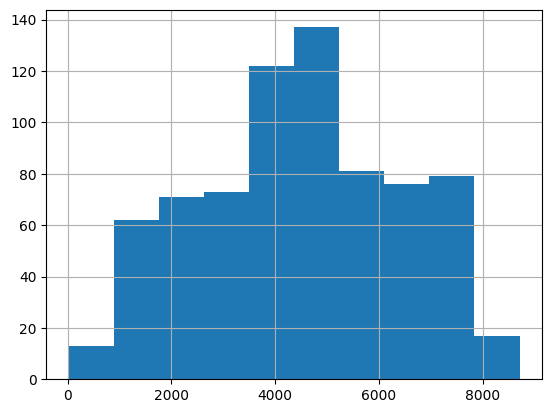

In [17]:
day_df.cnt.hist()

**Insight:**
- Dari history grafik yang ada, bisa dilihat bahwa modus jumlah penggunaan sepeda berada di sekitar angka 4000 - 5000

### Explore hour_df

In [18]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
12545,12546,2012-06-11,2,1,6,22,0,1,1,2,0.72,0.6667,0.58,0.1940,22,142,164
9665,9666,2012-02-12,1,1,2,16,0,0,0,1,0.20,0.1667,0.34,0.4627,16,148,164
15850,15851,2012-10-27,4,1,10,15,0,6,0,2,0.56,0.5303,0.60,0.2836,310,401,711
12303,12304,2012-06-01,2,1,6,20,0,5,1,3,0.62,0.5455,0.94,0.2537,1,38,39
4029,4030,2011-06-21,3,0,6,19,0,2,1,2,0.74,0.7121,0.74,0.2239,67,358,425


In [19]:
hour_df.groupby(by='hr').agg({
    "cnt":["sum", "min", "max", "mean"]
})

cnt                     
       sum min  max        mean
hr                             
0    39130   2  283   53.898072
1    24164   1  168   33.375691
2    16352   1  132   22.869930
3     8174   1   79   11.727403
4     4428   1   28    6.352941
5    14261   1   66   19.889819
6    55132   1  213   76.044138
7   154171   1  596  212.064649
8   261001   5  839  359.011004
9   159438  14  426  219.309491
10  126257   8  539  173.668501
11  151320  10  663  208.143054
12  184414   3  776  253.315934
13  184919  11  760  253.661180
14  175652  12  750  240.949246
15  183149   7  750  251.233196
16  227748  11  783  311.983562
17  336860  15  976  461.452055
18  309772  23  977  425.510989
19  226789  11  743  311.523352
20  164550  11  567  226.030220
21  125445   6  584  172.314560
22   95612   9  502  131.335165
23   63941   2  256   87.831044

**Insight:**
- Total penggunaan sepedah lebih banyak pada rentang jam 7 - 21

<Axes: >

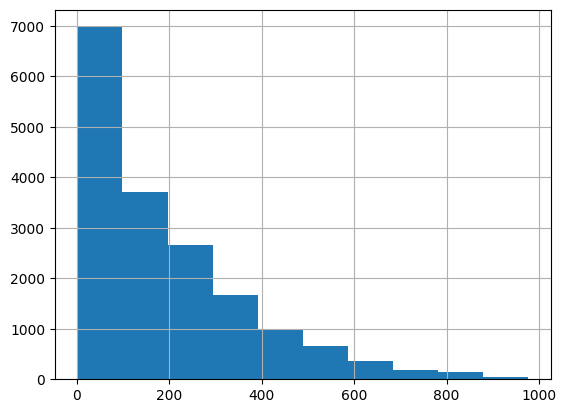

In [20]:
hour_df.cnt.hist()

**Insight:**
- Dari history grafik yang ada, untuk tiap jamnya, kebanyakan penggunaan sepedah hanya berkisar antara 1-100 pengguna. Jarang terdapat penggunaan sepeda lebih dari 400 penggunaan di jam yang sama

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan sepeda bulanan pada tiap tahunnya?

- Untuk mengetahui tren penggunaan sepeda bulanan maka data perlu dikelompok berdasarkan tahun dan bulannya. Karena disini data terdiri dari 2 tahun. Kemudian tambahkan fungsi agregasi mean untuk menghitung rata-rata bulanannya.
- Kemudian lakukan pelabelan untuk data pada kolom yr (year) dan mnth (month) agar label bukan kategorikal/angka yang merepresentasikan tahun dan bulan.

In [21]:
monthly_trend = day_df.groupby(['yr', 'mnth'])['cnt'].mean().reset_index()

#melakukan pelabelan untuk year dan month
monthly_trend['year'] = monthly_trend['yr'].map({0: 2011, 1: 2012})
monthly_trend['month'] = monthly_trend['mnth'].map({
                          1: "January",
                          2: "February",
                          3: "March",
                          4: "April",
                          5: "May",
                          6: "June",
                          7: "July",
                          8: "August",
                          9: "Sept",
                          10: "Oct",
                          11: "Nov",
                          12: "Dec"})

- Buat grafik dengan line chart karena cocok digunakan untuk mengvisualisasikan trend dari waktu ke waktu

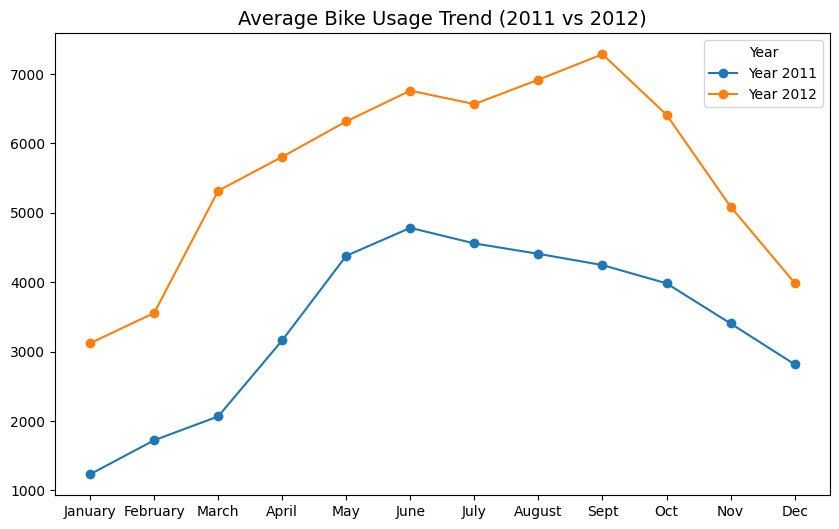

In [22]:
plt.figure(figsize=(10, 6))

for year, group in monthly_trend.groupby('year'):
    plt.plot(group['month'], group['cnt'], marker='o', label=f'Year {year}')

# Tambahkan detail pada plot
plt.title('Average Bike Usage Trend (2011 vs 2012)', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Year')
plt.show()

**Insight:**
- Dari line chart tersebut dapat dilihat bahwa baik pada tahun 2011 maupun tahun 2012, penggunaan sepeda lebih banyak dipertengahan bulan yaitu dari may hingga october.
- Pada awal bulan penggunaan sepeda masih sedikit, kemudian performanya menaik seiring pergantian bulan, kemudian turun kembali ketika mendekati akhir bulan

### Pertanyaan 2: Berapa tingkat penggunaan sepeda pada tiap musim?

In [23]:
# mengelompokan data berdasarkan tahun dan musim
seasonal_usage = day_df.groupby(['yr', 'season'])['cnt'].mean().reset_index()

# melakukan pelabelan dengan mapping
seasonal_usage['year'] = seasonal_usage['yr'].map({0: 2011, 1: 2012})
seasonal_usage['season_name'] = seasonal_usage['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

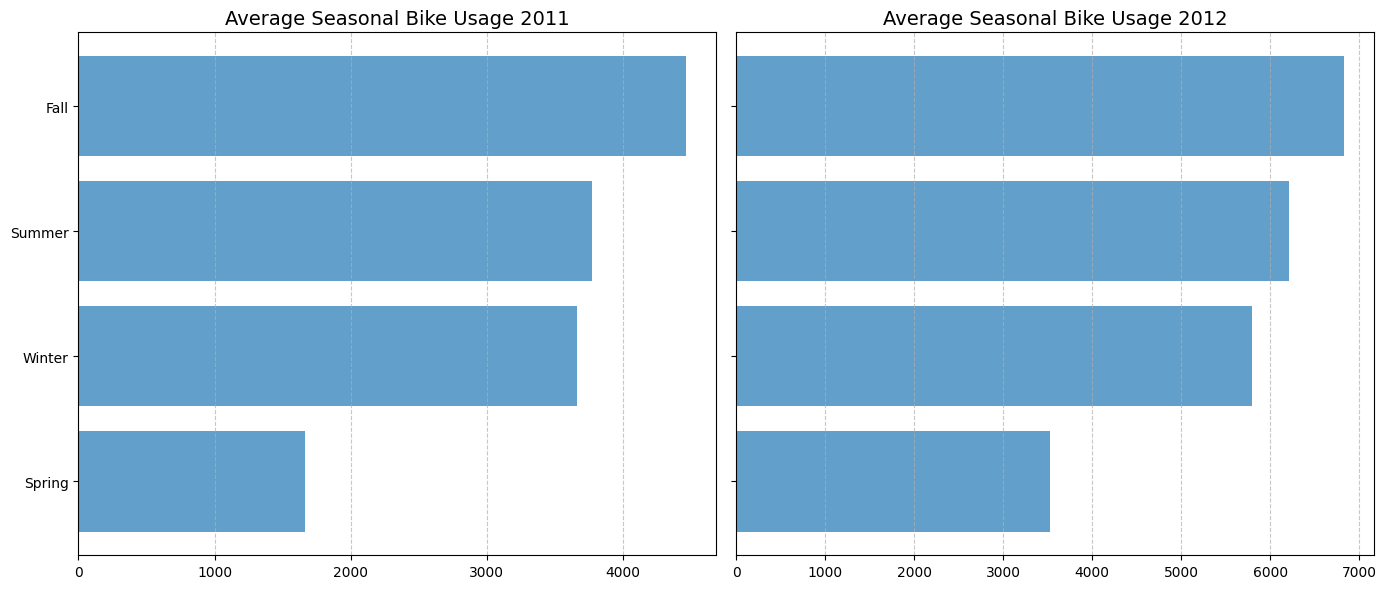

In [24]:
# Buat bar chart
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plotkan data untuk setiap tahun

i = 0
for i, (year, group) in enumerate(seasonal_usage.groupby('year')):

    sorted_group = group.sort_values('cnt')

    axes[i].barh(sorted_group['season_name'], sorted_group['cnt'], alpha=0.7)
    axes[i].set_title(f'Average Seasonal Bike Usage {year}', fontsize=14)
    axes[i].grid(axis='x', linestyle='--', alpha=0.7)
    i = i + 1

# Tambahkan detail pada plot
plt.tight_layout()
plt.show()

**Insight:**
- Pada barchart diatas baik pada tahun 2011 maupun 2012, penggunaan sepeda terbanyak ada pada musim fall, sementara penggunaan sepeda terendah berada pada musim spring
- Urutan musim dengan penggunaan sepeda dari terbanyak hingga terendah : </br>
1) Fall </br>
2) Summer </br>
3) Winter </br>
4) Spring

## Analisis Lanjutan (Opsional)

## Conclusion

- Penggunaan sepeda cenderung meningkat pada pertengahan tahun, khususnya dari bulan Mei hingga Oktober, di mana aktivitas bersepeda berada pada puncaknya. Sebaliknya, di awal dan akhir tahun, penggunaan sepeda cenderung lebih rendah. Penyewa sepeda dapat mengoptimalisasi layanannya seperti memperbanyak jumlah sepeda yang disewakan pada bulan-bulan tersebut
- Aktivitas bersepeda paling tinggi terjadi di musim gugur (fall), diikuti oleh musim panas (summer), musim dingin (winter), dan paling rendah pada musim semi (spring). Hal ini menunjukkan bahwa kondisi cuaca dan kenyamanan bersepeda kemungkinan besar memengaruhi intensitas penggunaan sepeda. Penyewa sepeda dapat melakukan promosi pada bulan-bulan tertentu seperti mengedakan kegiatan bersepeda bersama di musim gugur.